In [31]:
# Cell 1 - Imports
import numpy as np
import matplotlib.pyplot as plt

# Multilayer Perceptron (MLP) Implementation from Scratch

## Introduction
A Multilayer Perceptron (MLP) is a type of artificial neural network that consists of at least three layers of nodes: 
- Input layer
- Hidden layer(s)
- Output layer

Each node is a neuron that uses a nonlinear activation function. MLPs are fully connected networks where each node in one layer connects to every node in the following layer.

## Key Components
1. Forward Propagation
2. Backward Propagation
3. Weight Updates
4. Activation Functions

In [32]:
# Cell 2 - Activation Functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

## Activation Functions
- **Sigmoid**: Maps input to values between 0 and 1
- **Tanh**: Maps input to values between -1 and 1
- Both functions are differentiable, which is crucial for backpropagation

## Network Initialization
- Weights are initialized with small random values
- Biases are initialized to zero
- Network architecture is defined by input, hidden, and output layer sizes

## Forward Propagation
1. Input data is multiplied by first layer weights
2. First layer bias is added
3. Result is passed through activation function
4. Process repeats for subsequent layers

## Backward Propagation
1. Calculate error at output layer
2. Propagate error backwards through network
3. Calculate gradients for weights and biases
4. Update parameters using gradient descent

In [37]:
# Cell 3 - MLP Class Definition
class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.weights1 = np.random.randn(input_size, hidden_size) * 0.01
        self.weights2 = np.random.randn(hidden_size, output_size) * 0.01
        
        self.bias1 = np.zeros((1, hidden_size))
        self.bias2 = np.zeros((1, output_size))
        
        self.hidden_size = hidden_size
        self.output_size = output_size


    # Cell 4 - Forward Propagation
    def forward(self, X):
        # Forward propagation through the network
        self.z1 = np.dot(X, self.weights1) + self.bias1
        self.a1 = sigmoid(self.z1)
        
        self.z2 = np.dot(self.a1, self.weights2) + self.bias2
        self.a2 = self.z2
        
        return self.a2

    # Cell 5 - Backward Propagation
    def backward(self, X, y, learning_rate):
        m = X.shape[0]
        
        # Calculate gradients
        dZ2 = self.a2 - y
        dW2 = (1/m) * np.dot(self.a1.T, dZ2)
        db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)
        
        dZ1 = np.dot(dZ2, self.weights2.T) * sigmoid_derivative(self.a1)
        dW1 = (1/m) * np.dot(X.T, dZ1)
        db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)
        
        # Update weights and biases
        self.weights2 -= learning_rate * dW2
        self.bias2 -= learning_rate * db2
        self.weights1 -= learning_rate * dW1
        self.bias1 -= learning_rate * db1


    # Cell 6 - Training Function
    def train(self, X, y, epochs, learning_rate):
        losses = []
        
        for epoch in range(epochs):
            # Forward propagation
            output = self.forward(X)
            
            # Calculate loss
            loss = np.mean(np.square(y - output))
            losses.append(loss)
            
            # Backward propagation
            self.backward(X, y, learning_rate)
            
            if epoch % 1000 == 0:
                print(f'Epoch {epoch}, Loss: {loss}')
                
        return losses

## Training Process
- Iterative process of forward and backward propagation
- Loss is calculated to monitor training progress
- Parameters are updated using calculated gradients

Epoch 0, Loss: 1.98407758575129
Epoch 1000, Loss: 0.02626609945596711
Epoch 2000, Loss: 0.013654289132456341
Epoch 3000, Loss: 0.009690336345166745
Epoch 4000, Loss: 0.00765036305231091
Epoch 5000, Loss: 0.006388512779510143
Epoch 6000, Loss: 0.0055219835663257765
Epoch 7000, Loss: 0.004883892265519656
Epoch 8000, Loss: 0.004389985911933184
Epoch 9000, Loss: 0.003993692894649767


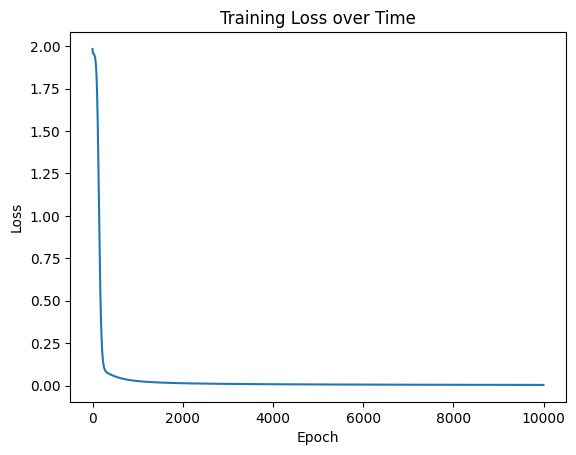

In [38]:
# Cell 7 - Example Usage
# Generate sample data
X = np.random.randn(100, 2)
y = np.array([(x[0] + x[1]).astype(float) for x in X]).reshape(-1, 1)
   

# Create and train model
mlp = MLP(input_size=2, hidden_size=4, output_size=1)
losses = mlp.train(X, y, epochs=10000, learning_rate=0.1)

# Plot training loss
plt.plot(losses)
plt.title('Training Loss over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

## Testing the Implementation
- Generate synthetic binary classification data
- Train model for 1000 epochs
- Plot loss curve to visualize training progress

In [36]:
# Cell 8 - Model Evaluation
# Make predictions
x = np.array([5,10])
mlp.forward(x)

# Calculat

array([[6.06867289]])

## Model Evaluation
- Convert probability outputs to binary predictions
- Calculate classification accuracy
- Additional metrics could include precision, recall, F1-score